<a href="https://colab.research.google.com/github/Hercules-Peters/DevCount_001/blob/main/Image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing modules**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image

**Loading CIFAR-10 dataset**

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


**Normalizing pixel values to range [0, 1]**

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

**Data Augmentation**

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)
datagen.fit(x_train)

**Defining the model**

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(256, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10)
])


**Compile the model**

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

**Training the model with data augmentation**

In [ ]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    steps_per_epoch=len(x_train) / 32, epochs=15,
                    validation_data=(x_test, y_test))

Epoch 1/15
1562/1562 [==============================] - 220s 139ms/step - loss: 1.8495 - accuracy: 0.0951 - val_loss: 1.6356 - val_accuracy: 0.0564
Epoch 2/15
1562/1562 [==============================] - 214s 137ms/step - loss: 1.3478 - accuracy: 0.0983 - val_loss: 1.2595 - val_accuracy: 0.1425
Epoch 3/15
1562/1562 [==============================] - 216s 138ms/step - loss: 1.1672 - accuracy: 0.0999 - val_loss: 1.1682 - val_accuracy: 0.0758
Epoch 4/15
1562/1562 [==============================] - 240s 154ms/step - loss: 1.0566 - accuracy: 0.1019 - val_loss: 0.9287 - val_accuracy: 0.0991
Epoch 5/15
1562/1562 [==============================] - 221s 141ms/step - loss: 0.9994 - accuracy: 0.1003 - val_loss: 0.9950 - val_accuracy: 0.1199
Epoch 6/15
1562/1562 [==============================] - 217s 139ms/step - loss: 0.9442 - accuracy: 0.1018 - val_loss: 0.9020 - val_accuracy: 0.0783
Epoch 7/15
1562/1562 [==============================] - 215s 137ms/step - loss: 0.8989 - accuracy: 0.1010 - val_

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 30, 30, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 28, 28, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                        

**Evaluating the model on test data**

1. Since, we used 30 epochs the model might not be very accurate. But we can increase the number of epochs to have better outcomes however, it will take longer time.


In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy:", test_accuracy)

313/313 - 9s - loss: 0.6544 - accuracy: 0.1064 - 9s/epoch - 29ms/step
Test accuracy: 0.10639999806880951


**Saving our model for reusability**

In [ ]:
model.save("cifar10_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**for uploading files for local storage**

In [ ]:
from google.colab import files
file = files.upload()

Saving cow1.jpg to cow1.jpg


**Using our model to make predictions**

1. Resize to match input shape of the model
2. Normalize pixel values to [0, 1]
3. Add batch dimension

1/1 [==============================] - 0s 26ms/step


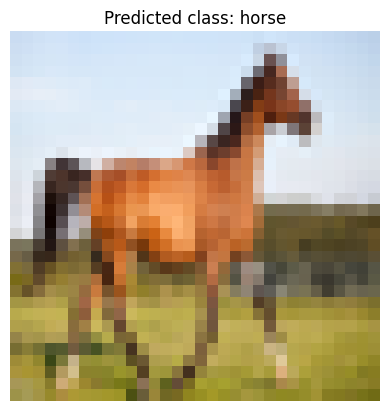

In [ ]:
import matplotlib.pyplot as plt
def predict_image(image_path):
    class_names = ["airplane", "automobile", "bird", "cat", "deer",
                   "dog", "frog", "horse", "ship", "truck"]

    image = Image.open(image_path)
    image = image.resize((32, 32))
    image_array = np.array(image) / 255.0
    image_array = np.expand_dims(image_array, axis=0)

    predicted_logits = model.predict(image_array)
    predicted_class_index = np.argmax(predicted_logits)
    predicted_class = class_names[predicted_class_index]

    # Displaying the image
    plt.imshow(image)
    plt.axis('off')
    plt.title("Predicted class: " + predicted_class)
    plt.show()

# Making predictions on a new image
new_image_path = "/content/horse2.jpg"
predict_image(new_image_path)
